In [1]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math
from datetime import datetime
import cv2

In [33]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def doublethreshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

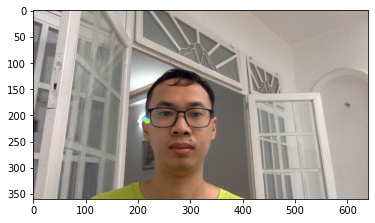

In [6]:
orig_old = pil.Image.open("../../Image/old_frame.jpg")
orig_new = pil.Image.open("../../Image/frame.jpg")
oldimg = img2array(orig_old)
newimg = img2array(orig_new)
plt.imshow(oldimg)

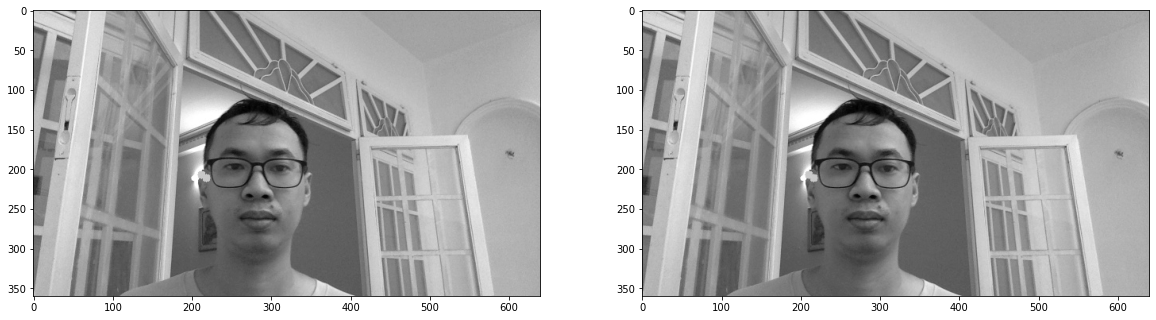

In [7]:
oldgray = rgb2gray(oldimg)
newgray = rgb2gray(newimg)

# old vs. new
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(oldgray, cmap='gray')
axarr[1].imshow(newgray, cmap='gray')

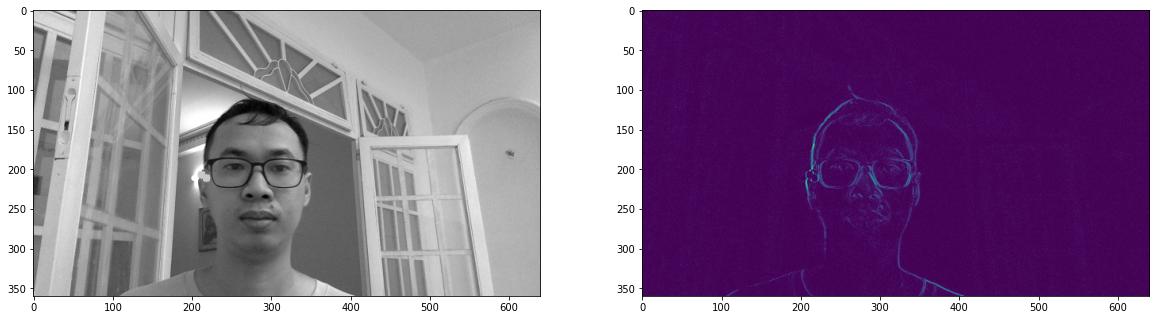

In [11]:
mydiff = np.abs(np.subtract(newgray, oldgray))

# old vs. diff
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(oldgray, cmap='gray')
axarr[1].imshow(mydiff)

In [12]:
def calculateGradient(old_frame, new_frame):
    m, n = old_frame.shape
    img = np.copy(new_frame)
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    Gt = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
                
    for i in range(0, m):
        for j in range(0, n):
            Gt[i, j] = new_frame[i,j] - old_frame[i,j]
            
    return Gx,Gy,Gt,G,theta

In [21]:
start_time = datetime.now()
myGx, myGy, myGt, myG, mytheta = calculateGradient(oldgray, newgray)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateGradient", end_time - start_time))

Duration - calculateGradient: 0:00:01.736373


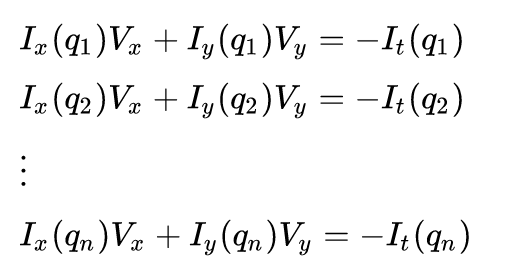

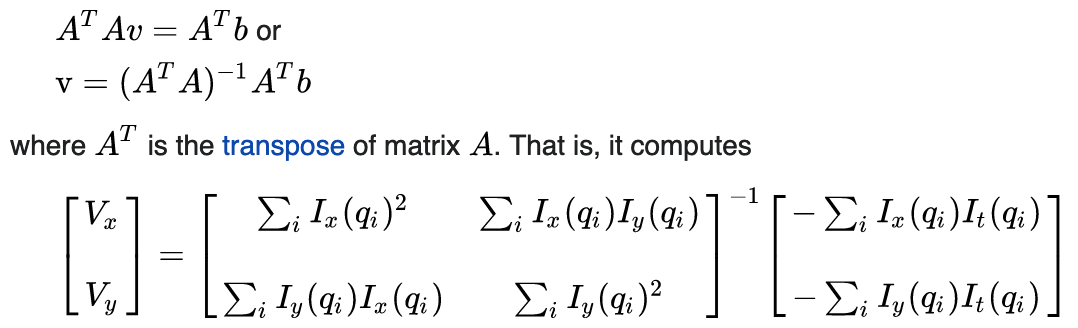

In [61]:
def calculateVxVy(Gx, Gy, Gt):
    m, n = Gt.shape
    Vx = np.zeros([m, n])
    Vy = np.zeros([m, n])
    V = np.zeros([m,n])
    
    for i in range(2,m-2):
        for j in range(2, n-2):
            A = np.zeros([2,2])
            b = np.zeros([2,1])
            for k in range(i-1,i+2):
                for l in range(j-1,j+2):
                    A[0,0] = A[0,0] + Gx[k,l]*Gx[k,l]
                    A[0,1] = A[0,1] + Gx[k,l]*Gy[k,l]
                    A[1,0] = A[1,0] + Gy[k,l]*Gx[k,l]
                    A[1,1] = A[1,1] + Gy[k,l]*Gy[k,l]
                    b[0,0] = b[0,0] - Gx[k,l]*Gt[k,l]
                    b[1,0] = b[1,0] - Gy[k,l]*Gt[k,l]
            x = np.zeros([2,1])
            x = np.linalg.solve(A,b)
            Vx[i,j] = x[0,0]
            Vy[i,j] = x[1,0]
            V[i,j] = math.sqrt(x[0,0]*x[0,0] + x[1,0]*x[1,0])
            
            
    return Vx, Vy, V

In [62]:
start_time = datetime.now()
myVx, myVy, myV = calculateVxVy(myGx, myGy, myGt)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateVxVy", end_time - start_time))

Duration - calculateVxVy: 0:00:11.322983


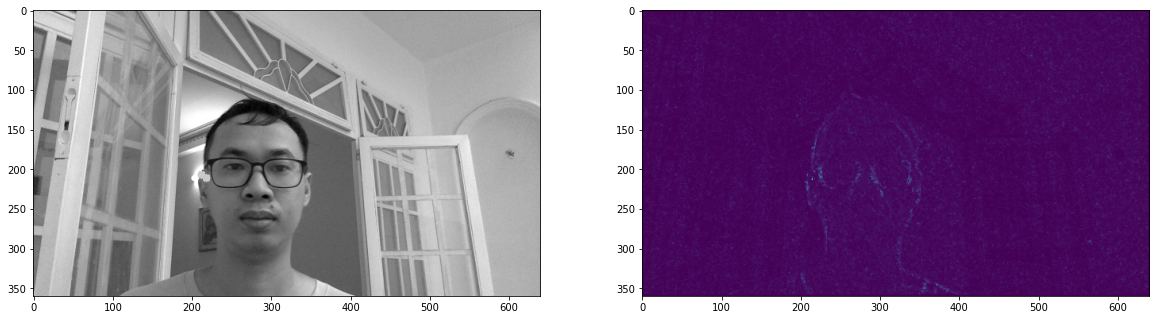

In [63]:
# Vy
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(oldgray, cmap='gray')
axarr[1].imshow(myV)

In [64]:
# Apply Gaussian Filter
start_time = datetime.now()
mygraysmoothimg=applyGaussFilter(myV, mygauss)
end_time = datetime.now()
print('Duration - {}: {}'.format("ApplyGaussFilter", end_time - start_time))
# Calculate Gradients and Angles
start_time = datetime.now()
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)
end_time = datetime.now()
print('Duration - {}: {}'.format("calculateGradient", end_time - start_time))
# Calculate Non Max Suppression
start_time = datetime.now()
NMS_G = non_max_suppression(G, theta)
end_time = datetime.now()
print('Duration - {}: {}'.format("non_max_suppression", end_time - start_time))
# Calculate double threshold
start_time = datetime.now()
mythreshold, weak, strong = doublethreshold(NMS_G, 0.001, 0.1)
end_time = datetime.now()
print('Duration - {}: {}'.format("threshold", end_time - start_time))
# Calculate hysteresis
start_time = datetime.now()
myhysteresis = hysteresis(mythreshold, weak)
end_time = datetime.now()
print('Duration - {}: {}'.format("hysteresis", end_time - start_time))

Duration - ApplyGaussFilter: 0:00:03.986654
Duration - calculateGradient: 0:00:01.628062
Duration - non_max_suppression: 0:00:00.542691
Duration - threshold: 0:00:01.972078
Duration - hysteresis: 0:00:00.058322


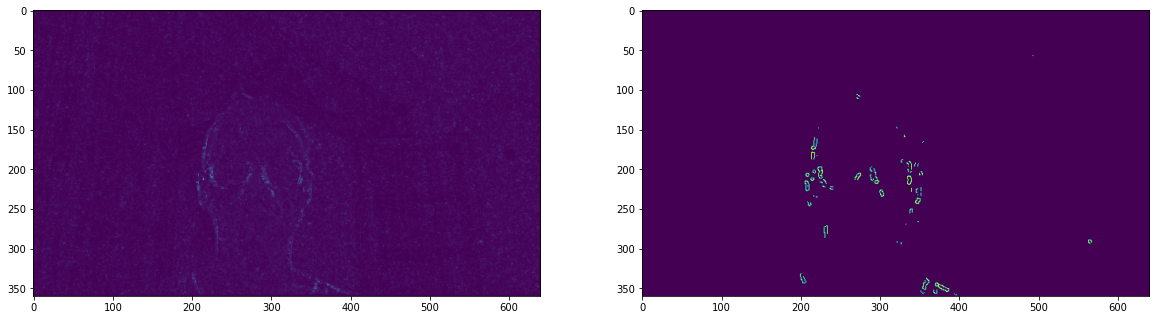

In [65]:
# Smooth vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(myV)
axarr[1].imshow(myhysteresis)

In [66]:
def normalize(myin):
    m, n = myin.shape
    myout = np.zeros([m,n])
    mybin = np.zeros([m,n])
    
    mymax = myin[0,0]
    mymin = myin[0,0]
    
    for i in range(0,m):
        for j in range(0,n):
            if myin[i,j] > mymax:
                mymax = myin[i,j]
            if myin[i,j] < mymin:
                mymin = myin[i,j]
    
    print("mymax: ", mymax)
    print("mymin: ", mymin)
    
    myrange = mymax - mymin
    
    for i in range(0,m):
        for j in range(0,n):
            myout[i,j] = int((myin[i,j] - mymin)*255/myrange)
            
    for i in range(0,m):
        for j in range(0,n):
            if myout[i,j] > 70:
                mybin[i,j] = 255
            
    return myout, mybin
    

mymax:  7.461608041625128
mymin:  0.0


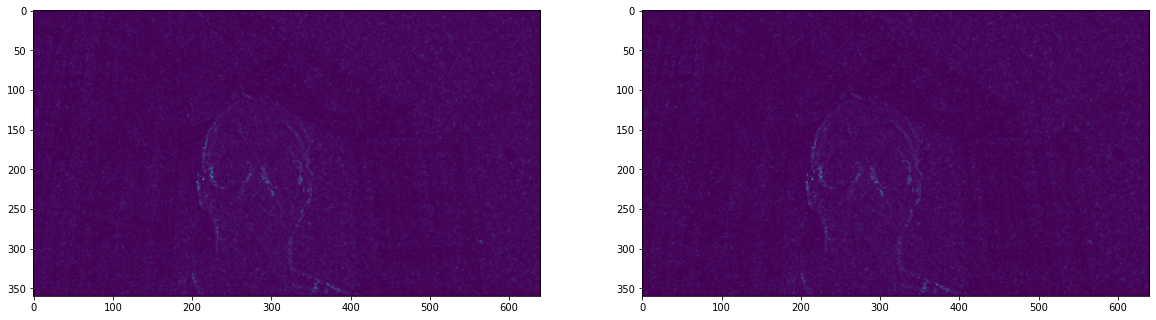

In [67]:
mynormV, myVbin = normalize(myV)

# myV vs. mynormV
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(myV)
axarr[1].imshow(mynormV)

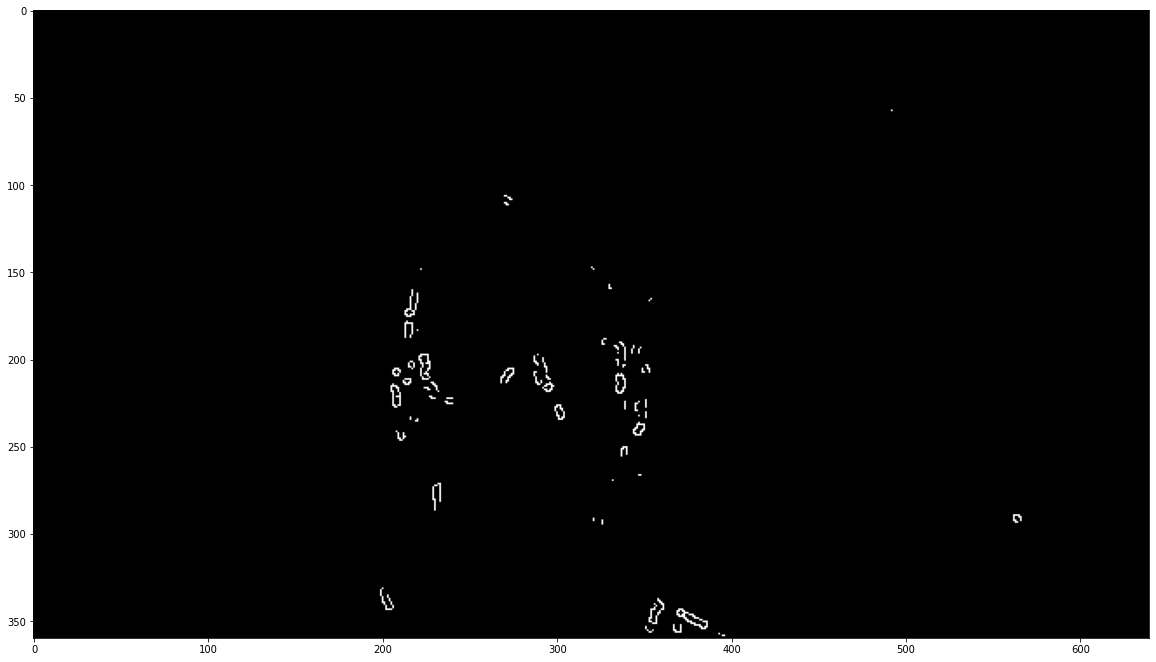

In [60]:
f, axarr = plt.subplots(1,1, figsize=(20, 20))
axarr.imshow(myhysteresis, cmap='gray')